# **Project Overview**

##**Objective**: Develop a machine learning model to classify iris flower species (setosa, versicolor, virginica) based on sepal and petal measurements.  
##**Dataset**: The [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), containing 150 samples with features like SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and the target Species.  
##**Key Steps**:  
##1. **Data Preprocessing**: Remove duplicates, handle outliers, and standardize features.  
##2. **Exploratory Data Analysis (EDA)**: Visualize distributions, correlations, and class balance.  
##3. **Feature Engineering**: Create a new feature (SepalPetalRatio).  
##4. **Model Development and Evaluation**: Train and evaluate Logistic Regression, Random Forest, and SVM models.  Compare accuracy, precision, recall, F1-score, and cross-validation performance.  
##5. **Model Performance Summary**: Summarize the model performance and give recommendations on the best model.

# **1. Importing Libraries**

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

 ## **Libraries:** numpy and pandas for data manipulation, matplotlib/seaborn for visualization, and scikit-learn for ML tasks.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Data Loading and Preprocessing**

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/IRIS.csv')

In [4]:
# Checking the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Drop 'Id' column (irrelevant)
df.drop("Id", axis=1, inplace=True)

# Checking number of rows and column present
df.shape

(150, 5)

In [6]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Summary of Numerical variables
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Checking for missing values
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [9]:
# Checking for sum of Duplicate values
df.duplicated().sum()

3

In [10]:
# Removing Duplicate values
df.drop_duplicates(inplace=True)

In [11]:
# checking counts of "Species"
df.value_counts("Species")

,count
Species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


## The dataset initially had 150 rows; after deduplication, 147 rows remained.  

# **2. Exploratory Data Analysis (EDA)**

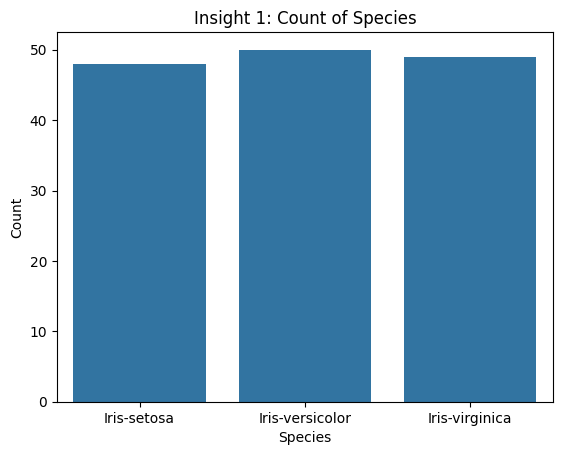

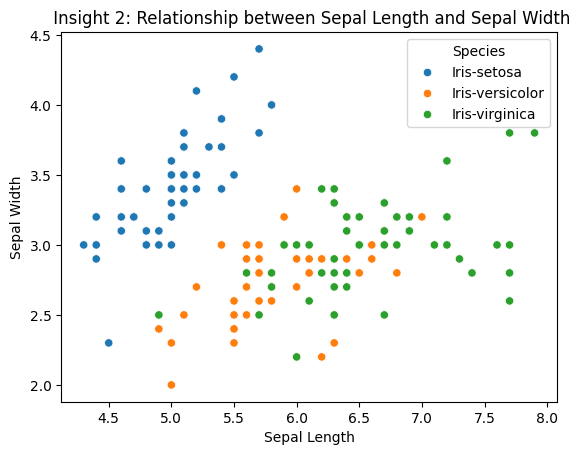

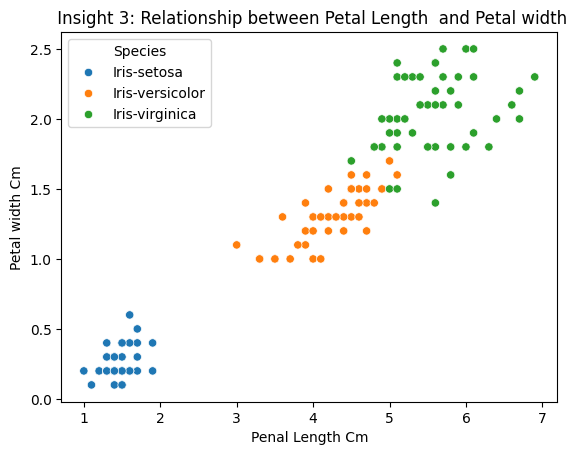

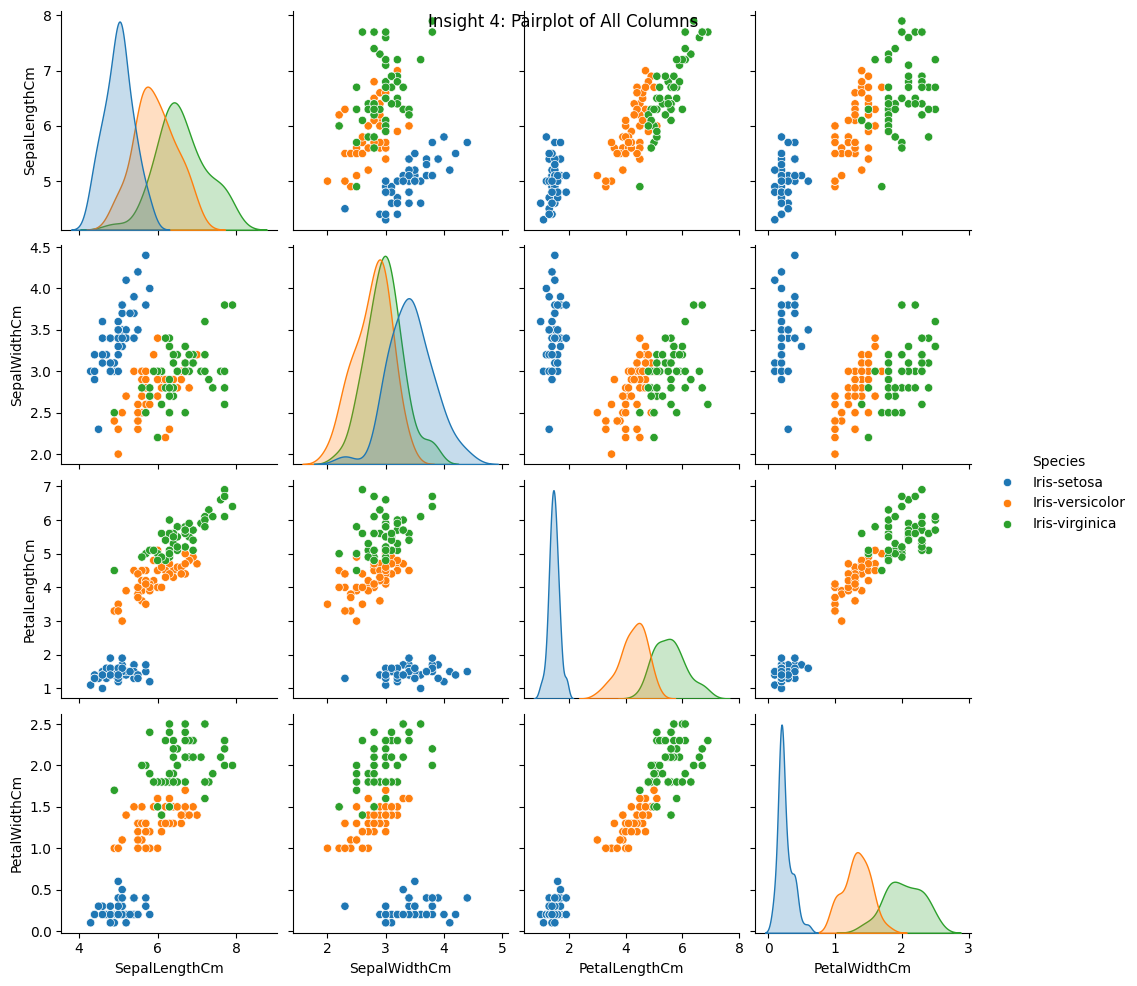

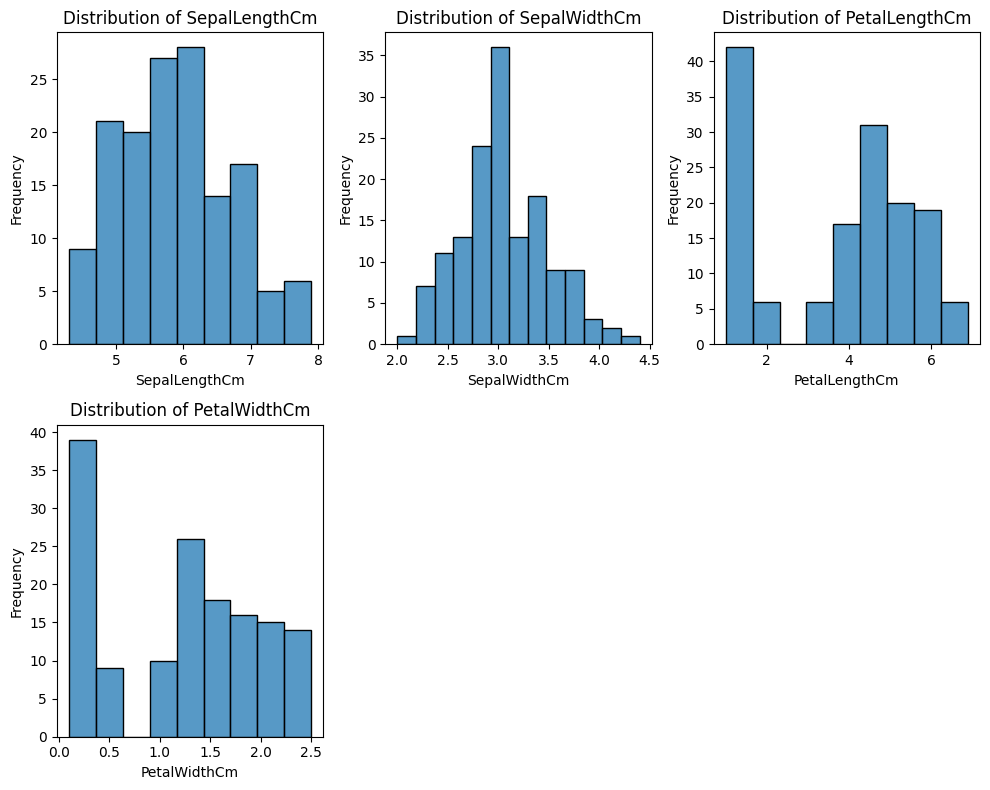

In [12]:
# Insight 1: countplot for target variables "Species"
sns.countplot(x='Species', data=df, )
plt.title("Insight 1: Count of Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# Insight 2: scatterplot showing relationship between Sepal  Length and Sepal width
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, )
plt.title(" Insight 2: Relationship between Sepal Length and Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Species")
plt.show()

# Insight 3: scatterplot showing relationship between Petal Length and Petal width
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df, )
plt.title(" Insight 3: Relationship between Petal Length  and Petal width")
plt.xlabel("Penal Length Cm")
plt.ylabel("Petal width Cm")
plt.legend(title="Species")
plt.show()

# Insight 4: Pairplot for all the column's relationship
sns.pairplot(df, hue="Species")
plt.suptitle("Insight 4: Pairplot of All Columns")
plt.show()

# Insight 5: Histogram Distribution of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col])
    plt.title(f"Distribution of {col}",)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


##Insight 1: **Count Plot** Showing balanced distribution of species.
##Insight 2 & 3: **Scatter Plots** Revealed clear separation between species in both sepal measurements and petal measurements.  
##Insight 4 & 5 **Pair Plot**: Highlighted strong correlations between petal length/width and species.   
##Insight 6: **Histogram** Showing the Distribution of all numerical features


##**Boxplots for outliers**

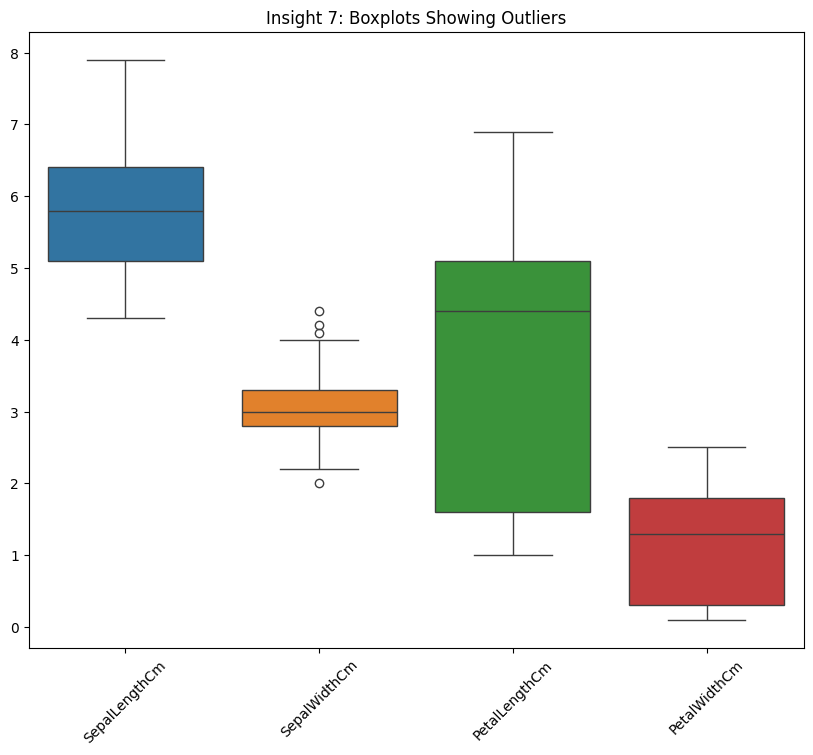

In [13]:
# Insight 7: Boxplots showing outliers
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_cols])
plt.title("Insight 7: Boxplots Showing Outliers")
plt.xticks(rotation=45)
plt.show()

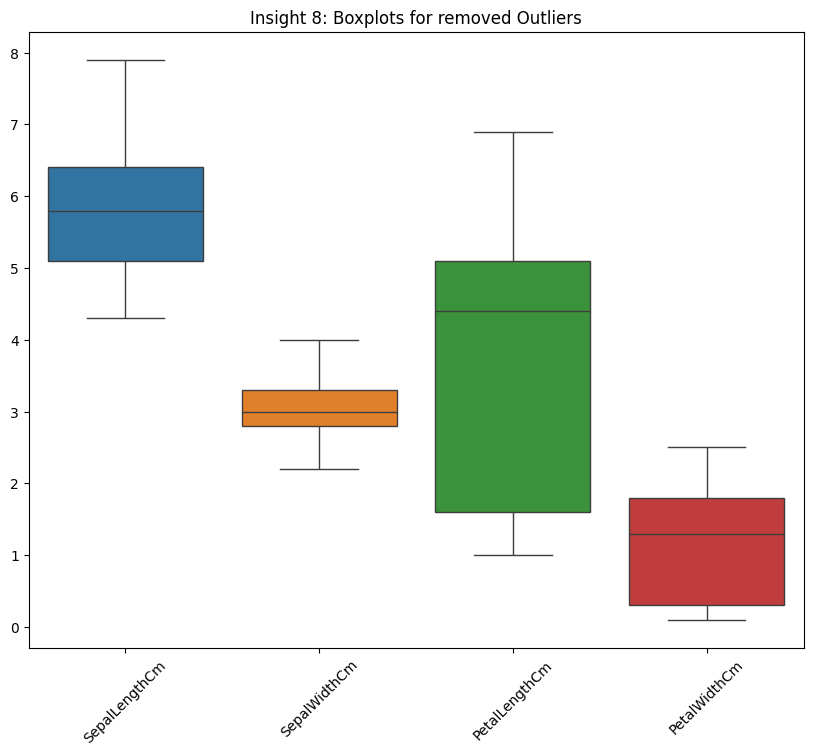

In [14]:
# Remove outliers
# Select only numerical columns for quantile calculations
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculate quantiles for outlier detection
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_cleaned = df[~((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)]

# Insight 8: Boxplot showing removed outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cleaned[numerical_cols])
plt.title("Insight 8: Boxplots for removed Outliers")
plt.xticks(rotation=45)
plt.show()

## Outlier was identified using **Boxplot** and Quantiles was used in calculating outliers detection Identified in SepalWidthCm, which were removed and displayed.

#**3. Feature Engineering**

In [15]:
# Create a new feature: ratio of sepal length to sepal width
df["SepalPetalRatio"] = df["SepalLengthCm"] / df["PetalLengthCm"]

# Separate features and target
X = df.drop(columns=["Species"])
y = df["Species"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalPetalRatio
0,-0.915509,1.019971,-1.357737,-1.3357,1.553168
1,-1.157560,-0.128082,-1.357737,-1.3357,1.417659
2,-1.399610,0.331139,-1.414778,-1.3357,1.527109
3,-1.520635,0.101529,-1.300696,-1.3357,1.006615
4,-1.036535,1.249582,-1.357737,-1.3357,1.485414


##**New Feature** (SepalPetalRatio) was created to capture interactions between sepal and petal dimensions.  
##Features was Standardize to ensure features like SepalLengthCm and SepalWidthCm have similar scales for model training.  


#**4. Model Development and Evaluation**

**Splitting data into training and testing sets**

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

**Model Selection, Training and Evaluation**

Logistic Regression Accuracy: 0.9777777777777777


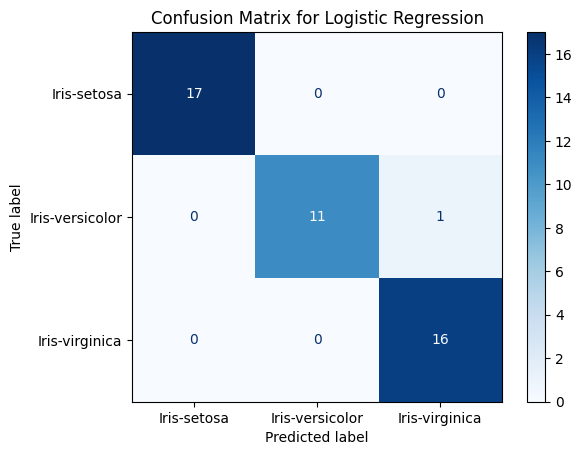

Random Forest Accuracy: 0.9555555555555556


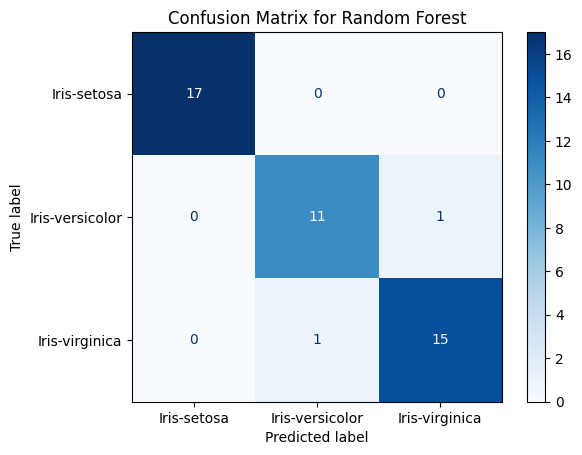

Support Vector Machine Accuracy: 0.9555555555555556


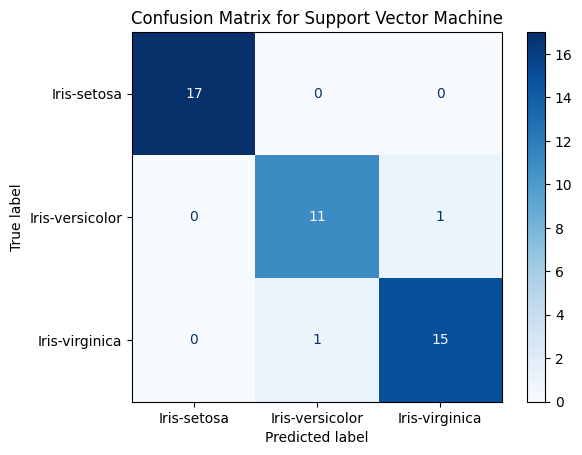

In [17]:
# Training Multiple Models

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}  # Store results for each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

    # Cross-validation - Moved inside the loop
    cv_scores = cross_val_score(model, X_scaled_df, y, cv=5, scoring='accuracy')

    # Store results - Moved inside the loop
    results[name] = {
        "accuracy": accuracy,
        "precision": precision_score(y_test, y_pred, average='weighted'),  # Calculate precision here
        "recall": recall_score(y_test, y_pred, average='weighted'),    # Calculate recall here
        "f1": f1_score(y_test, y_pred, average='weighted'),        # Calculate F1 here
        "cv_accuracy": cv_scores.mean()
    }

    # Plot Confusion Matrix for each model - Moved inside the loop
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)  # Create display object
    disp.plot(cmap='Blues')  # Plot the confusion matrix
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


In [18]:
# Classification Report for the models
for name, model in models.items():
    y_pred = model.predict(X_test)

    # Print Classification Report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Classification Report for Random Forest:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Classification Report for Support Vector Machine:

                 precision    recall  f1-score   suppor

# **5. Model Performance Summary**

##From the classification reports and confusion matrices:

##**Model	                 Accuracy	     Precision(Avg)	    Recall (Avg)	    F1-Score (Avg)**

##Logistic Regression 	 97.7%	       0.98	              0.97	                  0.98

##Random Forest	         95.6%	       0.95	              0.95	                  0.96

##SVM	                   95.6%	       0.96	              0.95	                  0.95

##**Model Interpretation & Selection**

##	1.	Logistic Regression performs the best, achieving 97.7% accuracy, meaning it generalizes well with high precision and recall across all classes.
##	2.	Random Forest is a strong alternative, offering interpretability through feature importance but with a slightly lower accuracy (95.6%).
##	3.	SVM is also effective but does not outperform Logistic Regression in this case.

##**Recommended Model: Logistic Regression**

##	•	It provides the highest accuracy.
##	•	It effectively classifies all three iris species with minimal misclassifications.
##	•	It is computationally efficient and interpretable.
##	•	It works well with the linearly separable nature of the dataset.